# BMI/CS 576 - HW6
The objectives of this homework are to better understand

* the statistical dependencies represented by a Bayesian network
* alternative representations of conditional probability distributions (CPDs)
* how model evidence works as a score for Bayesian networks
* the Sparse Candidate algorithm

## HW policies
Before starting this homework, please read over the [homework policies](https://canvas.wisc.edu/courses/167969/pages/hw-policies) for this course.  In particular, note that homeworks are to be completed *individually*.

You are welcome to use any code from the weekly notebooks in your solutions to the HW.

## PROBLEM 1 (30 POINTS)

Consider the Bayesian network below 

![simple_network](simple_network.png)

**(a)** Give a table specifying the joint probability distribution, $P(A, B, C)$ represented by the Bayesian network.

**(b)** Given your table from (a), compute $P(A = true\ |\ C = true)$

**(c)** Given your table from (a), compute $P(A = true\ |\ B = true)$

**(d)** Given your table from (a), compute $P(A = true\ |\ B = true, C = true)$

**(e)** Given your table from (a), is $A$ independent of $B$? Justify your answer.
  
**(f)** Given your table from (a), is $A$ independent of $B$ given $C$? Justify your answer.



(a)

| A | B | C | P |
| - | - | - | - |
| F | F | F | 0.3 |
| F | F | T | 0 |
| F | T | F | 0 |
| F | T | T | 0.3 |
| T | F | F | 0 |
| T | F | T | 0.2 |
| T | T | F | 0 |
| T | T | T | 0.2 |

(b) 

$
\begin{align}
& P(A = true\ |\ C = true) \\
& = \frac{P(A = true, C = true)}{P(C = true)} \\
& = \frac{0.2 + 0.2}{0.3 + 0.2 + 0.2} \\
& = 0.571428571
\end{align}
$

(c)

$
\begin{align}
& P(A = true\ |\ B = true) \\
&= \frac{P(A = true, B = true)}{P(B = true)} \\
& = \frac{0.2}{0.3 + 0.2} \\ 
& = 0.4
\end{align}
$

(d)

$
\begin{align}
& P(A = true\ |\ B = true, C = true)  \\
& = \frac{P(A = true, B = true, C = true)}{P(B = true, C = true)} \\ 
& = \frac{0.2}{0.3 + 0.2} \\
& = 0.4
\end{align}
$

(e)

$
P(A = true) = 0.4 = P(A = true\ |\ B = true) \\
P(A = true) = 0.4 = P(A = true\ |\ B = false) \\
P(A = false) = 0.6 = P(A = false\ |\ B = true) \\
P(A = false) = 0.6 = P(A = false\ |\ B = false) \\
\text{Therefore $A$ is independent of $B$}
$

(f)

$
P(A = true\ |\ C = true) = 0.571428571 \\
P(A = true\ |\ B = true, C = true)   = 0.4 \\
\text{Since $P(A = true\ |\ C = true) \neq P(A = true\ |\ B = true, C = true)$, $A$ is not independent of $B$ given $C$}
$

## PROBLEM 2 (25 POINTS)
As shown in the slide "Representing CPDs for Discrete Variables" (slide 8) of the lecture "Networks - Introduction to Bayesian Networks" some conditional probability distributions (CPD) can also be represented with a tree.

**(a)** Give the CPD table for the distribution $P(D\ |\ A,B,C)$ represented by the tree below.
![](decision_tree.png)

**(b)** Give the most compact tree (i.e., one with the fewest nodes) represention of the distribution $P(D\ |\ A,B,C)$ specified by the CPD table below.

![](decision_tree_cpd.png)

**(c)** Suppose that you know that the CPD $P(D\ |\ A,B,C)$ can be represented by the tree structure of part (a), but that you don't know the parameters at the leaves of the tree.  Now suppose you are given some training data with which to estimate the CPD.  What is the major advantage of the tree representation over the CPD table representation in estimating the parameters of the CPD?

(a)

| A | B | C |  T  |  F  | 
| - | - | - |  -  |  -  | 
| F | F | F | 0.8 | 0.2 |
| F | F | T | 0.8 | 0.2 |
| F | T | F | 0.7 | 0.3 |
| F | T | T | 0.7 | 0.3 | 
| T | F | F | 0.4 | 0.6 |
| T | F | T | 0.5 | 0.5 | 
| T | T | F | 0.4 | 0.6 |
| T | T | T | 0.5 | 0.5 | 

(b)
<pre>
               B                        
              / \                     
             /   \ 
          F /     \ T
           /       \
          /         \
    P(D=T)=0.75      A
                    / \
                   /   \ 
                F /     \ T
                 /       \
                /         \
          P(D=T)=0.5       C
                          / \
                         /   \ 
                      F /     \ T
                       /       \
                      /         \ 
              P(D=T)=0.25     P(D=T)=0.5
</pre>

(c)

The tree representation gives dependency information about the random variables. 

From the graph, we can clearly see that if we can determine that the value for A is True, then the value for B is no longer revelent. Similarily, once we are sure that the vaule for A is False, then the value for C is not revelent to the probability of D.

## PROBLEM 3 (30 POINTS)

Consider two possible Bayesian networks for two binary random variables, $X_1$ and $X_2$, shown below.

![](two_var_networks.png)

**(a)** Give the likelihood function, $P(D|G_0, \theta)$, for network $G_0$ in terms of the count variables shown in the table above.

**(b)** Give the likelihood function, $P(D|G_1, \theta)$, for network $G_1$ in terms of the count variables shown in the table above.

**(c)** Suppose that we estimate maximum likelihood values, $\hat{\theta}_{MLE}$, for the parameters of each of the two networks given a data set, $D$.  Show that $P(D|G_1, \hat{\theta}_{MLE}) \geq P(D|G_0, \hat{\theta}_{MLE})$ for any data set, $D$, and thus that the likelihood is not a good way to score networks. *Hint: consider what happens when $\theta_2 = \theta_{20} = \theta_{21}$.*

**(d)** Derive the model evidence, $P(D|G_0)$ for the network $G_0$ in terms of the count variables shown in the table above.

**(e)** Derive the model evidence, $P(D|G_1)$ for the network $G_1$ in terms of the count variables shown in the table above.

**(f)** Consider the case in which $n = 20$ and $n_{0-} = n_{1-} = n_{-0} = n_{-1} = 10$ (i.e., each row and column of the data table sum to half of the total observations).  Compute the difference in the log model evidence between the two models, $\log(P(D|G_1)) - \log(P(D|G_0))$, over all possible values of $n_{00}$ (note that specifying $n_{00}$ specifies all other counts).  These values indicate for which data sets we would prefer $G_1$ over $G_0$, and vice versa.  Show your results as a plot of $\log(P(D|G_1)) - \log(P(D|G_0))$ vs. $n_{00}$.

(a)

$
P(D|G_0, \theta) = \theta_1^{n_{0-}} (1-\theta_1)^{n_{1-}} \theta_2^{n_{-0}} (1-\theta_2)^{n_{-1}}
$

(b)

$
\begin{align}
P(D|G_1, \theta) 
& =
[\theta_1\theta_{20}] ^ {n_{00}}
[\theta_1(1-\theta_{20})] ^ {n_{01}}
[(1-\theta_1)\theta_{21}] ^ {n_{10}}
[(1-\theta_1)(1-\theta_{21})] ^ {n_{11}} \\ 
& = 
[\theta_1 ^ {n_{00}} 
\theta_{20} ^ {n_{00}}]
[\theta_1 ^ {n_{01}}
(1-\theta_{20}) ^ {n_{01}}]
[(1-\theta_1) ^ {n_{10}}
\theta_{21} ^ {n_{10}}]
[(1-\theta_1) ^ {n_{11}}
(1-\theta_{21}) ^ {n_{11}}] \\ 
& = 
[\theta_1 ^ {n_{00}} \theta_1 ^ {n_{01}}]
[(1-\theta_1) ^ {n_{10}} (1-\theta_1) ^ {n_{11}}]
\theta_{20} ^ {n_{00}}
(1-\theta_{20}) ^ {n_{01}}
\theta_{21} ^ {n_{10}}
(1-\theta_{21}) ^ {n_{11}} \\ 
& = 
\theta_1^{n_{0-}}
(1-\theta_1)^{n_{1-}}
\theta_{20} ^ {n_{00}}
(1-\theta_{20}) ^ {n_{01}}
\theta_{21} ^ {n_{10}}
(1-\theta_{21}) ^ {n_{11}}
\end{align}
$

(c)

$
\text{For sake of contradiction, suppose $P(D|G_0, \theta)> P(D|G_1, \theta)$. Then} \\ 
$
$$
\begin{align}
P(D|G_0, \theta) & > P(D|G_1, \theta) \\
\theta_1^{n_{0-}}
(1-\theta_1)^{n_{1-}}
\theta_2^{n_{-0}}
(1-\theta_2)^{n_{-1}}
& >
\theta_1^{n_{0-}}
(1-\theta_1)^{n_{1-}}
\theta_{20} ^ {n_{00}}
(1-\theta_{20}) ^ {n_{01}}
\theta_{21} ^ {n_{10}}
(1-\theta_{21}) ^ {n_{11}} \\ 
\theta_2^{n_{-0}}
(1-\theta_2)^{n_{-1}}
& >
\theta_{20} ^ {n_{00}}
(1-\theta_{20}) ^ {n_{01}}
\theta_{21} ^ {n_{10}}
(1-\theta_{21}) ^ {n_{11}} \\ 
\theta_2^{n_{00}}
\theta_2^{n_{10}}
(1-\theta_2)^{n_{01}}
(1-\theta_2)^{n_{11}}
& >
\theta_{20} ^ {n_{00}}
\theta_{21} ^ {n_{10}}
(1-\theta_{20}) ^ {n_{01}}
(1-\theta_{21}) ^ {n_{11}} \\ 
\end{align} \\
$$

$
\text{If $P(D|G_0, \theta)$ can be maximized at $\theta_{2} = \hat{\theta}_{2}$ for some $\hat{\theta}_{2}$. } 
\text{Setting $\theta_{20} = \theta_{21} = \hat{\theta}_{2}$ for $P(D|G_1, \theta)$. Then} \\
$

$$
\begin{align}
P(D|G_1, \theta)
& = 
\theta_1^{n_{0-}}
(1-\theta_1)^{n_{1-}}
\theta_{20} ^ {n_{00}}
(1-\theta_{20}) ^ {n_{01}}
\theta_{21} ^ {n_{10}}
(1-\theta_{21}) ^ {n_{11}} \\
& = 
\theta_1^{n_{0-}}
(1-\theta_1)^{n_{1-}}
\hat{\theta}_{2} ^ {n_{00}}
(1-\hat{\theta}_{2}) ^ {n_{01}}
\hat{\theta}_{2} ^ {n_{10}}
(1-\hat{\theta}_{2}) ^ {n_{11}}\\
& = \theta_1^{n_{0-}} (1-\theta_1)^{n_{1-}} \hat{\theta}_{2}^{n_{-0}} (1-\hat{\theta}_{2})^{n_{-1}} \\
& = P(D|G_0, \theta) 
\end{align}
$$

$
\text{So $P(D|G_1, \theta)$ can achieve the value as $P(D|G_0, \theta)$ with $\theta_{20} = \theta_{21} = \hat{\theta}_{2}$. } \\
\text{Therefore it is impossible that $P(D|G_0, \hat{\theta}_{MLE})> P(D|G_1, \hat{\theta}_{MLE})$. } \\
\text{Thus, $P(D|G_0, \hat{\theta}_{MLE}) \leq P(D|G_1, \hat{\theta}_{MLE})$}
$

(d)

$
\begin{align}
P(D|G_0) & = \int_{\theta}{P(D|\theta, G_0)P(\theta)d\theta} \\
& = \int_{\theta_1}{\theta_1^{n_{0-}} (1-\theta_1)^{n_{1-}} d\theta_1} \cdot 
    \int_{\theta_2}{\theta_2^{n_{-0}} (1-\theta_2)^{n_{-1}} d\theta_2} \\
& = \frac{\Gamma(n_{0-} + 1)\Gamma(n_{1-} + 1)}{\Gamma(n_{0-} + n_{1-} + 2)} \cdot
    \frac{\Gamma(n_{-0} + 1)\Gamma(n_{-1} + 1)}{\Gamma(n_{-0} + n_{-1} + 2)} \\
& = \left[(n+1)\binom{n}{n_{0-}}\right]^{-1} \left[(n+1)\binom{n}{n_{-0}}\right]^{-1}
\end{align}
$

(e)

$
\begin{align}
P(D|G_1) & = \int_{\theta}{P(D|\theta, G_1)P(\theta)d\theta} \\
& = \int_{\theta_1}{\theta_1^{n_{0-}} (1-\theta_1)^{n_{1-}} d\theta_1} \cdot 
    \prod_{i\in\{0, 1\}}{
        \int_{\theta_{2i}}{\theta_{2i}^{n_{i0}} (1-\theta_{2i})^{n_{i1}}d\theta_{2i}}
    } \\
& = \int_{\theta_1}{\theta_1^{n_{0-}} (1-\theta_1)^{n_{1-}} d\theta_1} \cdot 
    \int_{\theta_{20}}{\theta_{20}^{n_{00}} (1-\theta_{20})^{n_{01}}d\theta_{20}}\cdot 
    \int_{\theta_{21}}{\theta_{21}^{n_{10}} (1-\theta_{21})^{n_{11}}d\theta_{21}} \\
& = \left[(n+1)\binom{n}{n_{0-}}\right]^{-1}
    \left[(n_{0-}+1)\binom{n_{0-}}{n_{00}}\right]^{-1}
    \left[(n_{1-}+1)\binom{n_{1-}}{n_{10}}\right]^{-1}
\end{align}
$

(f)

In [8]:
import math
import matplotlib.pyplot as plt

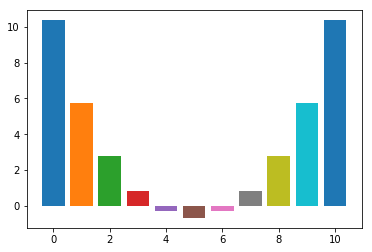

In [16]:
n = 20

for n00 in range(11):
    n01 = n/2 - n00
    n10 = n/2 - n00
    n11 = n - n01 - n10 - n00
    
    def binom(n, k):
        return math.factorial(n) // math.factorial(k) // math.factorial(n - k)
    
    def inv_binom(n, k):
        return ((n + 1) * binom(n, k)) ** -1

    
    g0 = inv_binom(n, n00 + n01) * inv_binom(n, n10 + n11)
    g1 = inv_binom(n, n00 + n01) * inv_binom(n00 + n01, n00) * inv_binom(n10 + n11, n10)
    
    plt.bar(n00, math.log(g1) - math.log(g0))

## PROBLEM 4 (15 POINTS) 


Suppose we wish to reconstruct the gene regulatory network for three genes, $X$, $Y$, and $Z$, using the Bayesian network approach and the “sparse candidate” algorithm. We are given data from 100 independent experiments in which the expression levels of the three genes are measured. For simplicity, we model each gene as being either “on” (T) or “off” (F). Below is a table summarizing the number of times (count) each configuration of gene expression status was observed in these experiments.


| X | Y | Z | count |
|---|---|---|-------|
| T | T | T |  36   |
| T | T | F |   4   |
| T | F | T |   2   |
| T | F | F |   8   |
| F | T | T |   9   |
| F | T | F |   1   |
| F | F | T |   8   |
| F | F | F |  32   |


**(a)** Suppose we wish to compute a single candidate parent for $Z$. In the first round of the “sparse candidate” algorithm, we compute the mutual information between $Z$ and the other random variables. Compute the mutual information between $Z$ and $X$, $I(X,Z)$, based on the frequencies observed in the data.

**(b)** Compute the mutual information between $Z$ and $Y$, $I(Y,Z)$, based on the frequencies observed in the data.

**(c)** Based on your answers to (a) and (b), which gene would be selected as the candidate parent for Z? Briefly explain your answer.

(a)

$
\begin{align}
I(X, Z) 
& =
\hat{P}(X=T, Z=T)\log{\frac{\hat{P}(X=T, Z=T)}{\hat{P}(X=T)\hat{P}(Z=T)}} \\
& \quad + \hat{P}(X=T, Z=F)\log{\frac{\hat{P}(X=T, Z=F)}{\hat{P}(X=T)\hat{P}(Z=F)}} \\
& \quad + \hat{P}(X=F, Z=T)\log{\frac{\hat{P}(X=F, Z=T)}{\hat{P}(X=F)\hat{P}(Z=T)}} \\
& \quad + \hat{P}(X=F, Z=F)\log{\frac{\hat{P}(X=F, Z=F)}{\hat{P}(X=F)\hat{P}(Z=F)}} \\
& = 
0.38 \log{\frac{0.38}{0.5\cdot0.55}} + 
0.12 \log{\frac{0.12}{0.5\cdot0.45}} + 
0.17 \log{\frac{0.17}{0.5\cdot0.55}} + 
0.33 \log{\frac{0.33}{0.5\cdot0.45}} \\
& = 0.0920811
\end{align}
$


(b)

$
\begin{align}
I(Y, Z) 
& =
\hat{P}(Y=T, Z=T)\log{\frac{\hat{P}(Y=T, Z=T)}{\hat{P}(Y=T)\hat{P}(Z=T)}} \\
& \quad + \hat{P}(Y=T, Z=F)\log{\frac{\hat{P}(Y=T, Z=F)}{\hat{P}(Y=T)\hat{P}(Z=F)}} \\
& \quad + \hat{P}(Y=F, Z=T)\log{\frac{\hat{P}(Y=F, Z=T)}{\hat{P}(Y=F)\hat{P}(Z=T)}} \\
& \quad + \hat{P}(Y=F, Z=F)\log{\frac{\hat{P}(Y=F, Z=F)}{\hat{P}(Y=F)\hat{P}(Z=F)}} \\
& = 
0.45 \log{\frac{0.45}{0.5\cdot0.55}} + 
0.05 \log{\frac{0.05}{0.5\cdot0.45}} + 
0.1 \log{\frac{0.1}{0.5\cdot0.55}} + 
0.4 \log{\frac{0.4}{0.5\cdot0.45}} \\
& = 0.275396
\end{align}
$


(c)

Since $I(Y, Z)$ > $I(X, Z)$, Y would be selected as the candidate parent for Z. 